In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as ah
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv("CC GENERAL.csv", sep=',')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.drop('CUST_ID', axis=1, inplace=True)

In [4]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data['CREDIT_LIMIT'].fillna(value= data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(value= data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

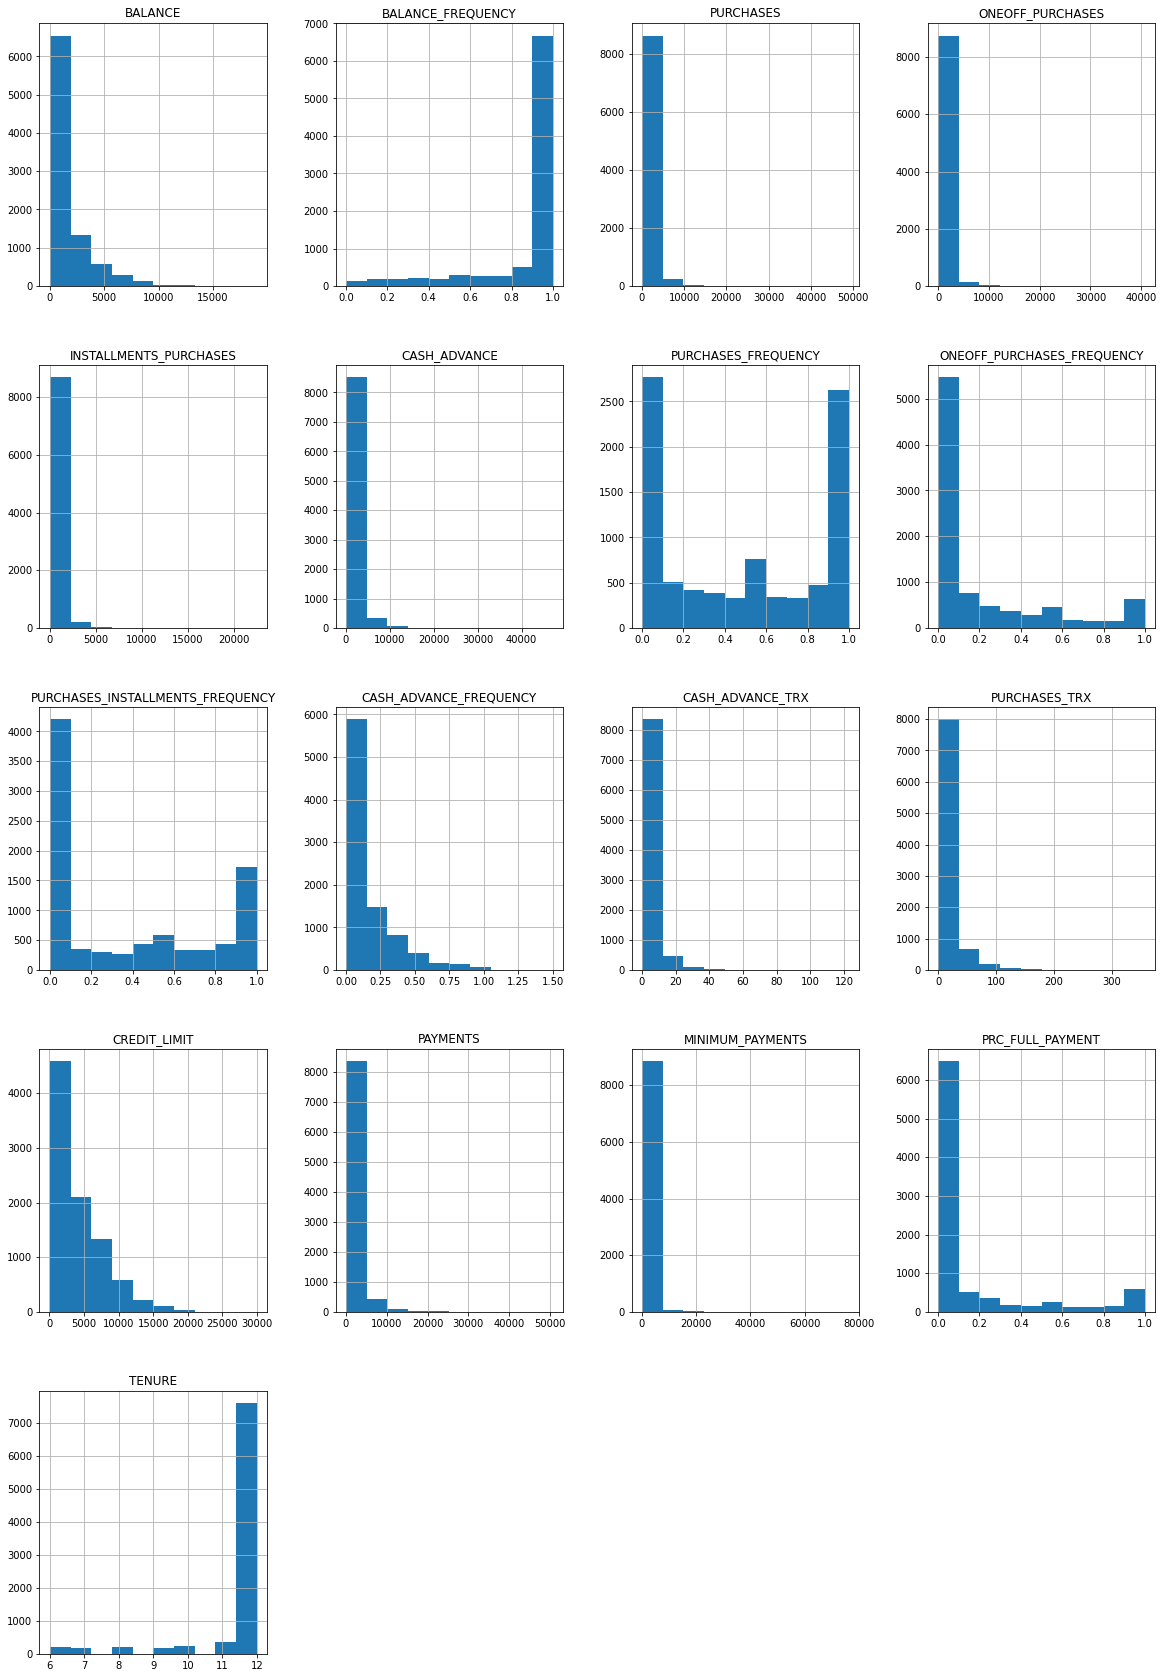

In [6]:
#Hstogrammes
data.hist(figsize=(20,30))
plt.show()

In [9]:
#Outliers Treatment
def remove_outlier (x) :
  qr1 = np.percentile(data[x],25)
  qr3 = np.percentile(data[x],75)
  iqr = qr3 - qr1 
  cutoff = iqr*1.5
  lower = qr1 - cutoff
  upper = qr3 + cutoff
  return (lower, upper)

lw, up = remove_outlier("PURCHASES")
lw1, up1 = remove_outlier("ONEOFF_PURCHASES")
lw2, up2 = remove_outlier("PAYMENTS")
lw3, up3 = remove_outlier("CASH_ADVANCE")
lw4, up4 = remove_outlier("MINIMUM_PAYMENTS")
lw5, up5 = remove_outlier("PURCHASES_TRX")
lw6, up6 = remove_outlier("CASH_ADVANCE_TRX")

data = data[(data["PURCHASES"]>=lw) & (data["PURCHASES"]<=up)]
data = data[(data["ONEOFF_PURCHASES"]>=lw1) & (data["ONEOFF_PURCHASES"]<=up1)]
data = data[(data["PAYMENTS"]>=lw2) & (data["PAYMENTS"]<=up2)]
data = data[(data["CASH_ADVANCE"]>=lw3) & (data["CASH_ADVANCE"]<=up3)]
data = data[(data["MINIMUM_PAYMENTS"]>=lw4) & (data["MINIMUM_PAYMENTS"]<=up4)]
data = data[(data["PURCHASES_TRX"]>=lw5) & (data["PURCHASES_TRX"]<=up5)]
data = data[(data["CASH_ADVANCE_TRX"]>=lw6) & (data["CASH_ADVANCE_TRX"]<=up6)]

data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6


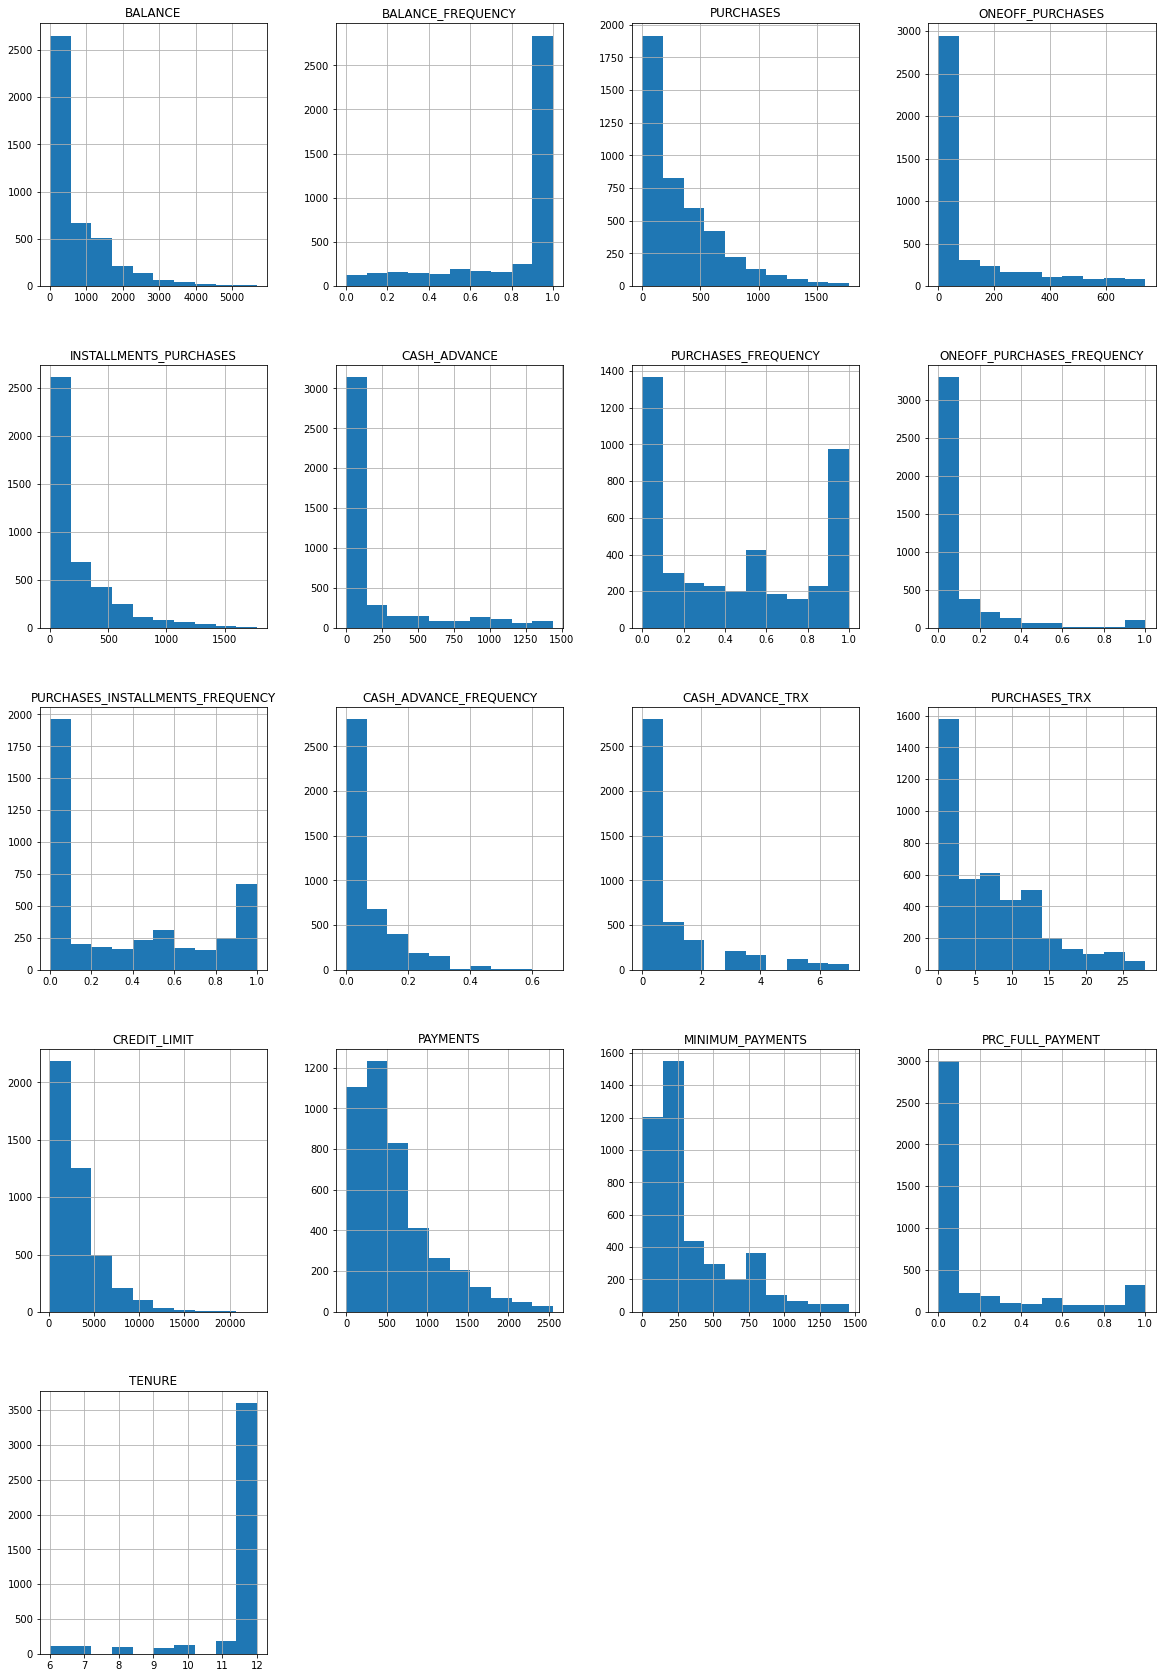

In [10]:
#New Histogrammes
data.hist(figsize=(20,30))
plt.show()

In [11]:
#DATA SCALING
from sklearn.preprocessing import StandardScaler
X = data[["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#PCA
pca = PCA(n_components=6)
data_pca = pca.fit_transform(X_scaled)
dfn = pd.DataFrame(data_pca ,  columns=['pca1' , 'pca2','pca3','pca4','pca5','pca6'])
dfn

,pca1,pca2,pca3,pca4,pca5,pca6
0,-0.799035,-1.931474,0.233909,-0.595496,-0.310083,-0.848235
1,-1.282982,-0.964748,0.639457,-0.948320,-0.165505,-0.853973
2,1.702381,1.015859,-1.255704,-1.908249,-0.850791,0.145380
3,0.888399,1.325490,2.519374,-0.060665,0.429673,0.200260
4,-2.829008,1.286052,0.044080,-2.276817,0.143292,0.719791
...,...,...,...,...,...,...
4308,-1.123983,-2.984182,0.383514,1.647861,-1.788980,2.343175
4309,1.686981,-1.726607,-1.799439,1.616732,-1.958913,1.936457
4310,0.973429,-0.693433,-1.650012,0.006460,-2.807051,3.050158
4311,0.766762,-2.244578,-1.307775,1.357527,-2.226713,2.128045


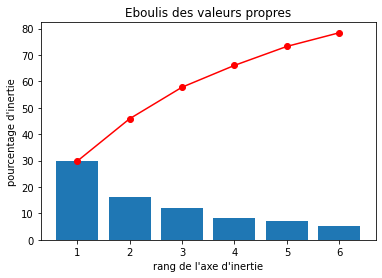

In [13]:
#PCA explained variance criterion
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)

In [14]:
new_data = dfn [['pca1','pca2','pca3','pca4']]

In [15]:
#Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4 , affinity='euclidean' ,linkage='complete')
label = model.fit_predict(new_data)
predicted_df = pd.DataFrame(label)

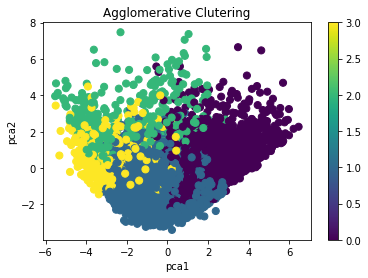

In [16]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_data ['pca1'] , new_data ["pca2"] , c= predicted_df[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
plt.colorbar(scatter)
plt.show()

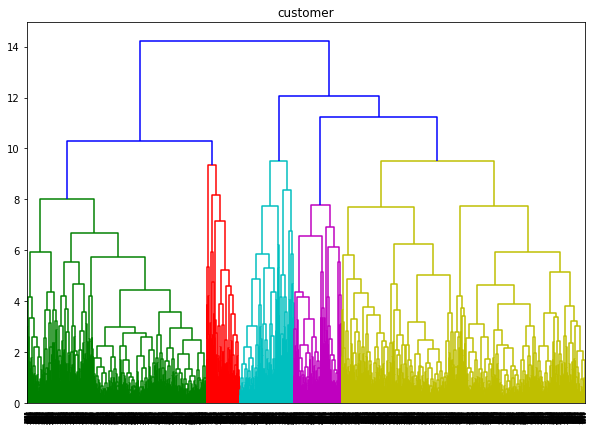

In [17]:
plt.figure( figsize=(10,7))
plt.title('customer')
dend = ah.dendrogram(ah.linkage(new_data , method='complete'))
plt.show()

In [29]:
#K-MEANS CLUSTERING
model_k = KMeans(n_clusters=4)
model_k.fit(new_data)
predicted_df = pd.DataFrame(model_k.labels_)
Clus_Cent_ = model_k.cluster_centers_
new_data['label'] = predicted_df
new_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pca1,pca2,pca3,pca4,label
0,-0.799035,-1.931474,0.233909,-0.595496,0
1,-1.282982,-0.964748,0.639457,-0.948320,0
2,1.702381,1.015859,-1.255704,-1.908249,3
3,0.888399,1.325490,2.519374,-0.060665,2
4,-2.829008,1.286052,0.044080,-2.276817,1
...,...,...,...,...,...
4308,-1.123983,-2.984182,0.383514,1.647861,0
4309,1.686981,-1.726607,-1.799439,1.616732,3
4310,0.973429,-0.693433,-1.650012,0.006460,3
4311,0.766762,-2.244578,-1.307775,1.357527,0


In [31]:
new_data.label

0       0
1       0
2       3
3       2
4       1
       ..
4308    0
4309    3
4310    3
4311    0
4312    0
Name: label, Length: 4313, dtype: int32

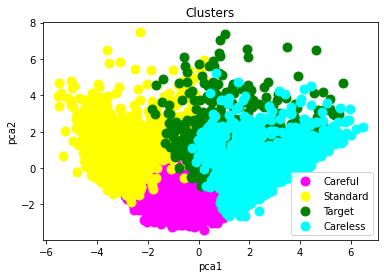

In [32]:
plt.scatter(new_data["pca1"][new_data.label == 0],          
            new_data["pca2"][new_data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(new_data["pca1"][new_data.label == 1],
           new_data["pca2"][new_data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(new_data["pca1"][new_data.label == 2],
           new_data["pca2"][new_data.label == 2],s=80,c='green',label='Target')
plt.scatter(new_data["pca1"][new_data.label == 3], 
           new_data["pca2"][new_data.label == 3],s=80,c='cyan',label='Careless')
#plt.scatter(new_data["pca1"][data.label == 4], 
           #new_data["pca2"][data.label == 4],s=80,c='burlywood',label='Sensible')
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

In [20]:
model_k.inertia_

20309.26493015484

In [21]:
sum_err = []
for k in range(1,10) :
  km=KMeans(n_clusters=k)
  km.fit(new_data)
  sum_err.append(km.inertia_)

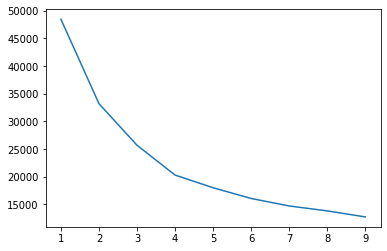

In [23]:
plt.plot(range(1,10),sum_err)
plt.show()

K=4 was indeed the good choice regarding the elbow method.

In [55]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:
            fig, ax = plt.subplots(figsize=(20,20))
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
           
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)        
         
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
               
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            
            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [56]:
col = ["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]

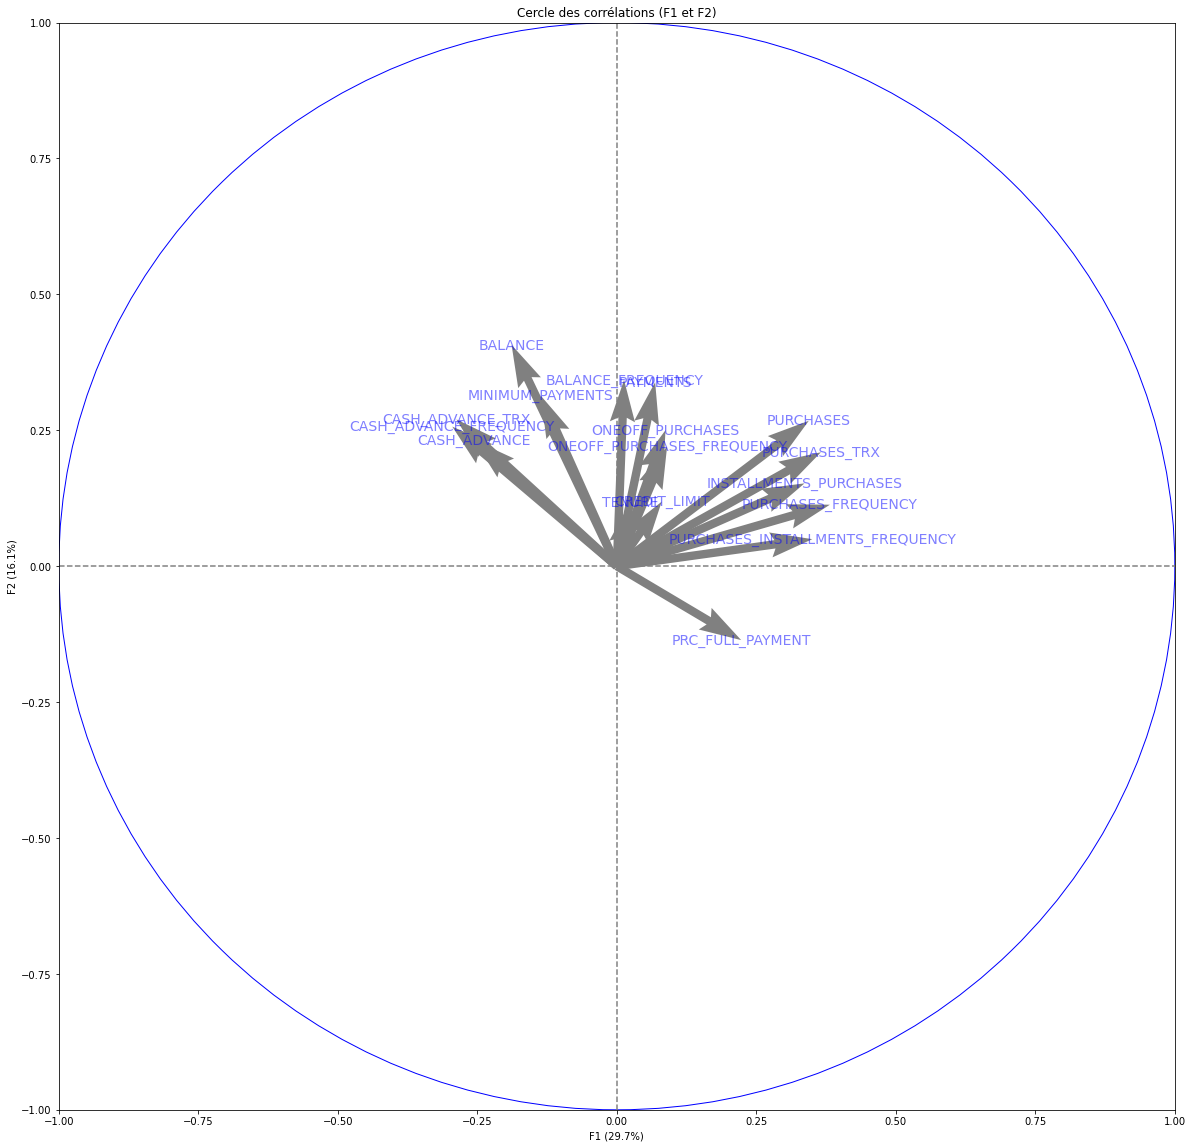

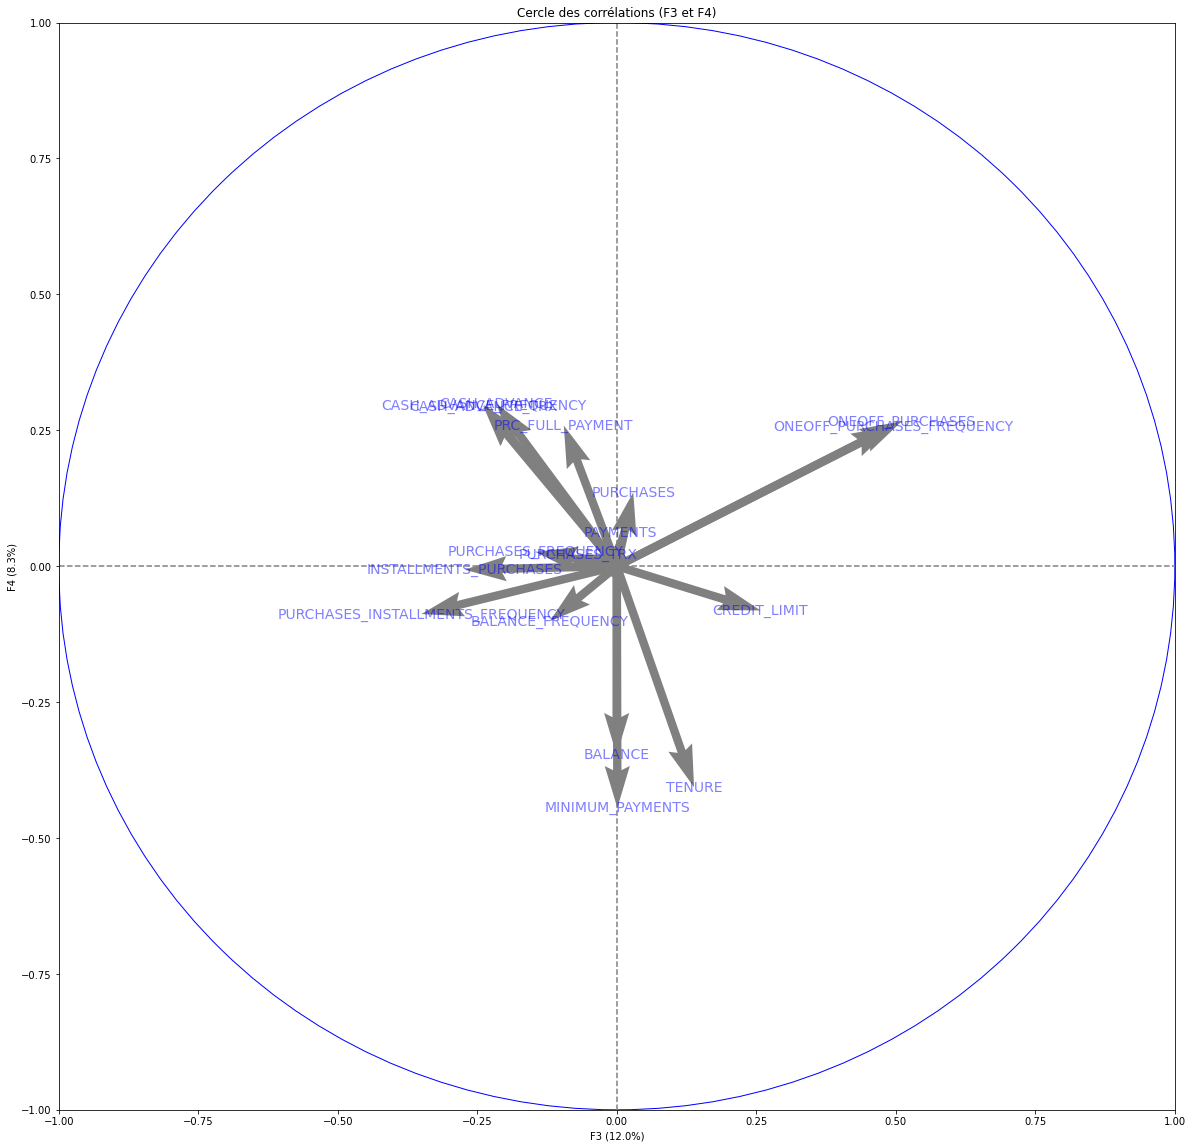

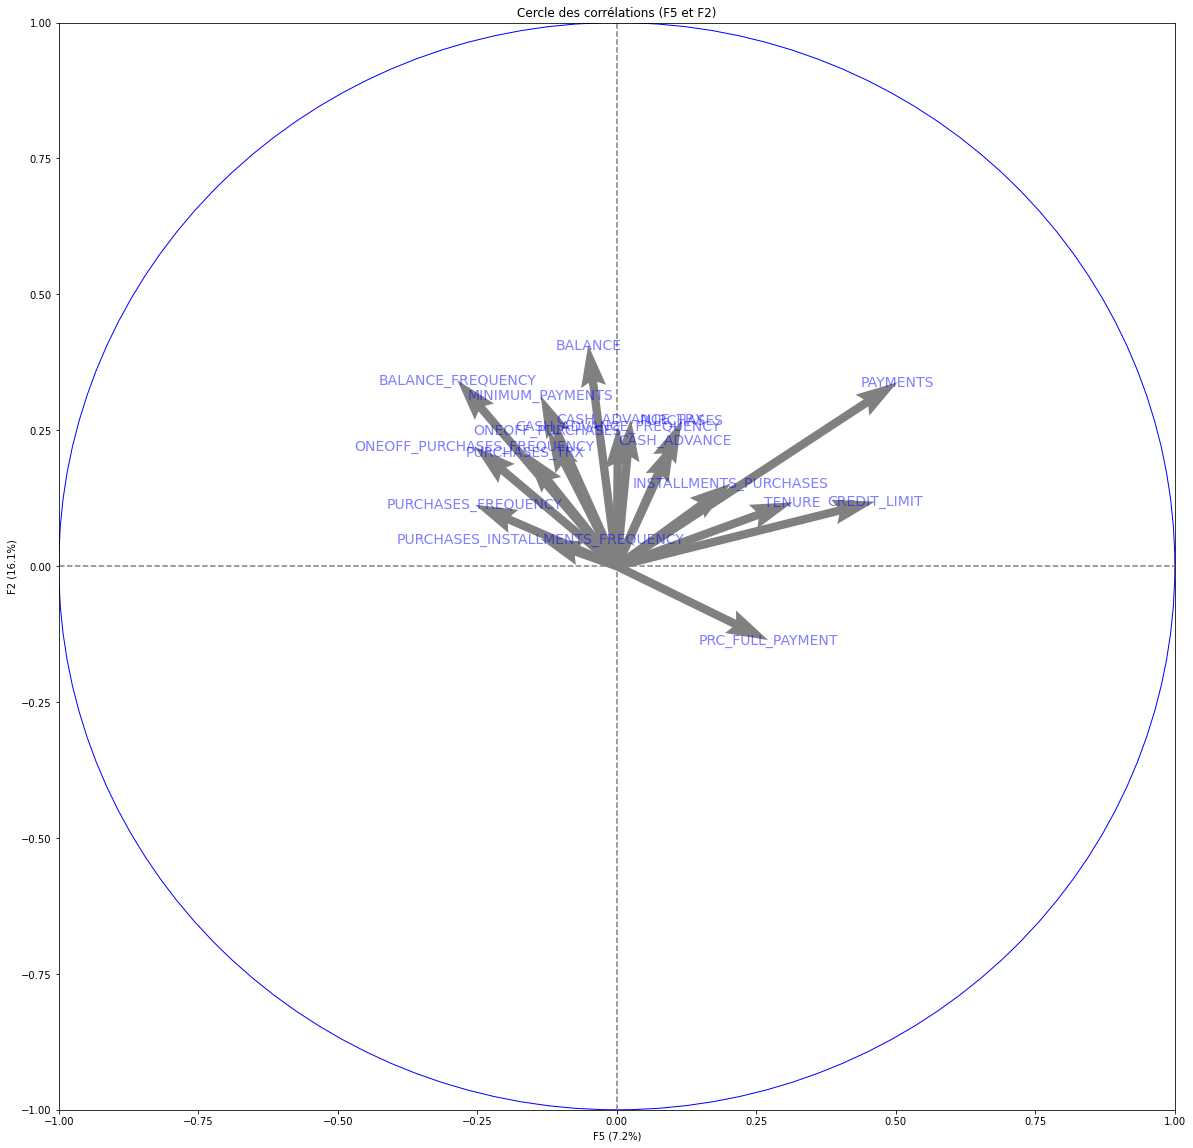

In [57]:
pcs = pca.components_
display_circles(pcs,6,pca, [(0,1),(2,3),(4, 1)] , labels= col)